In [1]:
# x is feature dataset, y consists of class labels
x = []
y = []

for k in range(1, 10):
    path2 = "data/a0" + str(k) + "/p"
    for j in range(1, 9):
        path1 = path2 + str(j) + "/s"
        for i in range(1, 10):
            path = path1 + "0" + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x.append(arr)
                    y.append(k)     #end numeric appended is activity label

        for i in range(10, 61):
            path = path1 + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x.append(arr)
                    y.append(k)
                    
for k in range(10, 20):
    path2 = "data/a" + str(k) + "/p"
    for j in range(1, 9):
        path1 = path2 + str(j) + "/s"
        for i in range(1, 10):
            path = path1 + "0" + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x.append(arr)
                    y.append(k)

        for i in range(10, 61):
            path = path1 + str(i) + ".txt"
            with open(path) as f:
                lines = f.readlines()
                for line in lines:
                    arr = line.split(",")
                    arr = [float(measurement) for measurement in arr]
                    x.append(arr)
                    y.append(k)

#125* 60* 8* 19 for 8 people and all 19 activity
#this x contains 1140000 rows and 45 columns. 45 columns are features

In [2]:
#importing the modules necessary
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import numpy as np

In [5]:
#using train_test_split to separate training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 20)

In [6]:
#standardizing the data improves the accuracy of model
standardScaler = StandardScaler()
standardScaler.fit(x_train) 
x_train = standardScaler.transform(x_train)
x_test = standardScaler.transform(x_test)

#using dimensional reduction results in poor accuracy, so we did not use it
#pca
# pca = PCA(n_components = 20)
# pca.fit(x_train)
# x_train = pca.transform(x_train)
# x_test = pca.transform(x_test)

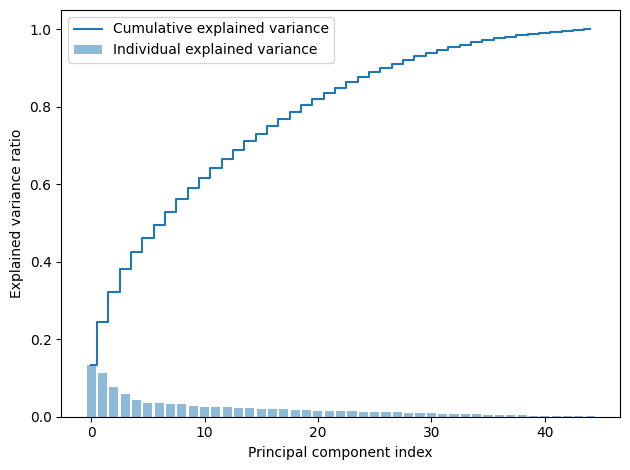

In [7]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(x_train)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
#using KNN as the classification model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

y_predicted = knn.predict(x_test)

In [9]:
labels = ['sitting', 'standing', 'lying on back side', 'lying on right side', 'ascending stairs','descending stairs',
          'standing in an elevator still', 'moving around in an elevator', 'walking in a parking lot',
         'walking on a treadmill with a speed of 4 km/h in flat position', 'walking on a treadmill with a speed of 4 km/h in 15 deg inclined position',
         'running on a treadmill with a speed of 8 km/h', 'exercising on a stepper',
         'exercising on a cross trainer', 'cycling on an exercise bike in horizontal position', 'cycling on an exercise bike in vertical position',
         'rowing', 'jumping', 'playing basketball']

print(classification_report(y_test, y_predicted, target_names = labels))

                                                                           precision    recall  f1-score   support

                                                                  sitting       1.00      1.00      1.00     15066
                                                                 standing       1.00      1.00      1.00     15016
                                                       lying on back side       1.00      1.00      1.00     15086
                                                      lying on right side       1.00      1.00      1.00     14978
                                                         ascending stairs       0.98      0.95      0.97     15244
                                                        descending stairs       0.92      1.00      0.96     14974
                                            standing in an elevator still       0.99      1.00      1.00     14984
                                             moving around in an elevator      

In [10]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_predicted))

0.9895017543859649
